In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
from google.colab import files
uploaded = files.upload()

Saving Combined.csv to Combined.csv


In [0]:
df = pd.read_csv('Combined.csv')
df = pd.DataFrame(df)

In [0]:
df.head

<bound method NDFrame.head of        voltage    current  percentage  ...       yat       zat  normality
0    16.423000   0.000000        0.99  ...  0.000151  0.002010          1
1    16.471001   0.000000        0.99  ... -0.000858 -0.001256          1
2    16.360001   0.000000        0.99  ... -0.001543 -0.001125          1
3    16.364000   0.000000        0.99  ...  0.000270  0.001531          1
4    16.417999   0.000000        0.99  ... -0.000740 -0.003595          1
..         ...        ...         ...  ...       ...       ...        ...
326  15.761000 -14.790000        0.98  ... -0.053420 -0.211177          0
327  16.080000 -33.389999        0.98  ... -0.064919  0.168218          0
328  15.559000 -37.840000        0.98  ... -0.202613 -0.648923          0
329  15.777000 -19.340000        0.98  ... -0.309288 -1.505729          0
330  16.330999 -12.190000        0.98  ... -0.249387 -1.439508          0

[331 rows x 74 columns]>

In [0]:

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
l = df.shape[1]

In [0]:
X = df[df.columns[:-1]]
y = df['normality']

In [0]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
326    0
327    0
328    0
329    0
330    0
Name: normality, Length: 331, dtype: int64


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size=0.8)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
pred = logmodel.predict(X_test)
logmodel.score(X,y)


0.9818731117824774

In [0]:
y_train.shape

(198,)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        29
           1       0.98      1.00      0.99       236

    accuracy                           0.98       265
   macro avg       0.99      0.90      0.94       265
weighted avg       0.98      0.98      0.98       265



In [0]:
from sklearn import tree
t = tree.DecisionTreeClassifier()
treemodel = t.fit(X_train,y_train)
pred = treemodel.predict(X_test)


In [0]:
treemodel.score(X,y)

0.972809667673716

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.98      0.98      0.98       236

    accuracy                           0.97       265
   macro avg       0.91      0.92      0.91       265
weighted avg       0.97      0.97      0.97       265



[Text(167.4, 163.07999999999998, 'X[51] <= 0.633\ngini = 0.195\nsamples = 265\nvalue = [29, 236]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 236\nvalue = [0, 236]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]')]

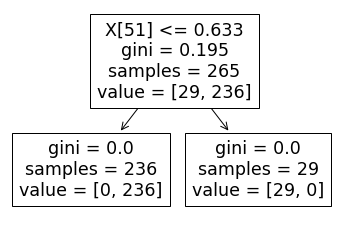

In [100]:
tree.plot_tree(treemodel.fit(X_test, y_test)) 

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [0]:
pred1 = bdt.predict(X_test)
bdt.score(X_test,y_test)

1.0

In [0]:
from sklearn.naive_bayes import GaussianNB
nbmod = GaussianNB()
m = nbmod.fit(X_train,y_train)
pred = m.predict(X_test)
m.score(X,y)

1.0

In [0]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)

In [0]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [0]:
finalDf = pd.concat([principalDf, df[['normality']]], axis = 1)

In [0]:
pca.explained_variance_ratio_

array([0.31149312, 0.15165119, 0.10877619, 0.0754806 , 0.06176144])

In [0]:
principalDf.head

<bound method NDFrame.head of      principal component 1  ...  principal component 5
0                 1.250013  ...              -5.327065
1                 1.227932  ...              -5.106361
2                 1.227081  ...              -4.824037
3                 1.222285  ...              -4.634683
4                 1.148005  ...              -4.656295
..                     ...  ...                    ...
326              21.434268  ...              -0.352125
327              21.096082  ...              -0.699291
328              22.907557  ...              -3.773600
329              23.706016  ...              -2.591715
330              23.853937  ...              -1.166897

[331 rows x 5 columns]>

In [0]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [0]:
X = df[df.columns[:-1]]
y = df['normality']

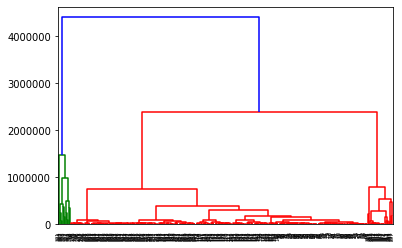

In [0]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [0]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [0]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


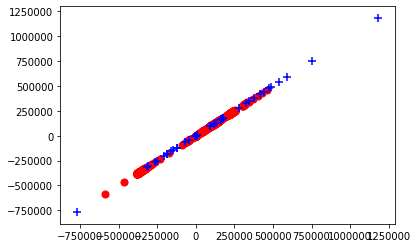

In [0]:
plt.scatter(X[labels==0], X[labels==0], s=50, marker='o', color='red')
plt.scatter(X[labels==1], X[labels==1], s=50, marker='+', color='blue')

plt.show()

In [0]:
from sklearn.svm import SVC
clf1 = SVC(gamma='auto',kernel = 'linear')
clf1.fit(X_train, y_train)
psvm = clf1.predict(X_test)


In [0]:
clf1.score(X_test,y_test)

0.9773584905660377

In [0]:
from sklearn.svm import SVC
clf1 = SVC(gamma='auto',kernel = 'rbf')
clf1.fit(X_train, y_train)
psvm = clf1.predict(X_test)
clf1.score(X_test,y_test)

0.8905660377358491

In [0]:
from sklearn.svm import SVC
clf1 = SVC(gamma='auto',kernel = 'poly')
clf1.fit(X_train, y_train)
psvm = clf1.predict(X_test)
clf1.score(X_test,y_test)

0.9886792452830189

In [0]:
from sklearn.svm import SVC
clf1 = SVC(gamma='auto',kernel = 'sigmoid')
clf1.fit(X_train, y_train)
psvm = clf1.predict(X_test)
clf1.score(X_test,y_test)

0.9283018867924528

In [0]:
from sklearn.svm import SVC
clf1 = SVC(gamma='auto' )
clf1.fit(X_train, y_train)
psvm = clf1.predict(X_test)
clf1.score(X_test,y_test)

0.8905660377358491